Bryan Flores <br>
ADS-509 <br>
Assignment 2.1 <br>
January 22, 2024

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import nltk
nltk.download('stopwords')  # Uncomment if necessary

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rudy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [3]:
# Add any additional import statements you need here
from nltk.tokenize import word_tokenize
from pathlib import Path
import glob

In [4]:
# change `data_location` to the location of the folder on your machine.
# data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"
data_location = "data/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [5]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(Counter(tokens).keys())
    lexical_diversity =  num_unique_tokens / num_tokens
    num_characters =  sum([len(token) for token in tokens])

    # Find 5 most common tokens and create dataframe for presentation
    top_5_tokens = Counter(tokens).most_common(5)
    df = pd.DataFrame(top_5_tokens, columns=['token', 'frequency'])
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print("===========================")
        print(f"The 5 most common tokens: ")
        print(df)        
        
    return([num_tokens, 
            num_unique_tokens,
            lexical_diversity,
            num_characters
            ])
    

In [6]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 5 most common tokens: 
     token  frequency
0     text          3
1     here          2
2  example          2
3       is          1
4     some          1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertions allow you to test your logic for errors and invalid assumptions and explicitly state what we expect to be True or False.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
# Read in the lyrics data
lyrics_path = data_location + lyrics_folder
PATH = glob.iglob(f'{lyrics_path}/*')

""" 
    Example format:
    {
        'artist': cher,
        'filename': "cher_88degrees.txt",
        'title': "88 Degrees",
        'lyrics': "Stuck in L.A., ain't got no friends ..."
    }
"""

lyrics_list = []

for subdir in PATH:

    # Define subdirectories
    path = Path(subdir).glob('*')

    # Iterate over song txt files
    for file in path:

        # Obtain file names, artists, song titles, and lyrics 
        filename = Path(file).name
        artist = filename.split("_")[0]
        title = open(file, 'r').readline().strip("\n")
        lyrics = ' '.join([line.strip() for line in open(file, 'r').readlines()[3:]]).lstrip()

        # Key-values
        lyrics_dict = {
            'artist': artist,
            'filename': filename,
            'title': title,
            'lyrics': lyrics
            }
        lyrics_list.append(lyrics_dict)

lyrics_df = pd.DataFrame(lyrics_list)

In [8]:
lyrics_df.head()

,artist,filename,title,lyrics
0,cher,cher_88degrees.txt,"""88 Degrees""","Stuck in L.A., ain't got no friends And so Hol..."
1,cher,cher_adifferentkindoflovesong.txt,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane Wou...
2,cher,cher_afterall.txt,"""After All""","Well, here we are again I guess it must be fat..."
3,cher,cher_again.txt,"""Again""",Again evening finds me at your door Here to as...
4,cher,cher_alfie.txt,"""Alfie""","What's it all about, Alfie? Is it just for the..."


In [9]:
def batch_generator(file_path, batch_size=1000):
    """
    Batches the input file by a given batch size.
    :param file_path: str, path to the followers data txt file
    :param batch_size: int, 1000 row default size
    :return batch:
    """
    with open(file_path, 'r') as file:
        batch = []
        for line in file:
            # Split row into parts by whitespaces
            parts = re.split(r'\s+', line.strip())
            
            # Skip lines with insufficient parts
            if len(parts) < 8:
                continue

            # Extract the 'description' value following the last integer
            description_val = ' '.join(parts[8:]) if len(parts) > 8 else ''

            # Append the description to the batch
            batch.append(description_val)

            # Yield the batch when it reaches the specified size
            if len(batch) == batch_size:
                yield batch
                batch = []

        # Yield the remaining batch
        if batch:
            yield batch

def batch_processor(file):     
    """ 
    Process the batches.
    :param file: str, follower data path
    :return descriptions: list, description values 
    """   
    # Process the file in batches
    descriptions = []

    for batch_num, batch in enumerate(batch_generator(file)):
        # Extend the list of descriptions with the current batch
        descriptions.extend(batch)

    return descriptions

In [10]:
# Read in the twitter data
twitter_path = data_location + twitter_folder
PATH = glob.iglob(f'{twitter_path}/*')

""" 
    Example format:
    {
        'cher': {
            'description': [" ", "𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜", ...]
            },
        'robyn': {
            'description': [""I love chill" ...", ...]
        }
    }
"""

descriptions = []

# Iterate over Twitter folder and follower data 
for file in PATH:
    # Obtain only the follower data files
    filename = Path(file).name
    if "data" in filename:
        # Get descriptions
        descriptions.append(batch_processor(file))

twitter_dict = {
    'cher': descriptions[0],
    'robyn': descriptions[1]
}

In [25]:
# Display sample output
twitter_dict['cher'][:10]

['𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜',
 '',
 '@Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com',
 '159 I’m unemployed and live with my parents. MOOPS!',
 'healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance',
 'thou wilt. 🖤✨',
 '163 Curious Canadian Contemplator. She/Her. Sexagenarian. We are here for each other!',
 'BLM. Mental health advocate. Do something nice for somebody today :)',
 "80'S VIVA MÉXICO",
 'Mudita 🧩 INFP🌻']

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [11]:
punctuation = set(punctuation) # speeds up comparison

In [12]:
def data_cleaning(input_list):
    """ 
    Clean data and return iterable for descriptive_stats.
    :param :
    :return :
    """
    # Set stop words
    stop_words = set(sw)

    tokenized_descs = []
    for item in input_list:

        # remove punctuation, lower, and tokenize
        clean_string = re.sub(r'[^\w\s]', '', item).lower().split()
    
        # Store transformed 
        filtered_sentence = [w for w in clean_string if not w.lower() in stop_words]

        # Check for empty lists after transformations
        if len(filtered_sentence) >= 1:
            tokenized_descs.append(filtered_sentence)

    return tokenized_descs

In [13]:
# create your clean twitter data here
cher_twt_clean = data_cleaning(twitter_dict['cher'][:1000])  # Cher

In [14]:
robyn_twt_clean = data_cleaning(twitter_dict['robyn'][:1000])  # Robyn

In [15]:
# create your clean lyrics data here
lyrics_df['lyrics_tokenized'] = data_cleaning(lyrics_df['lyrics'])

In [16]:
lyrics_df.head()

,artist,filename,title,lyrics,lyrics_tokenized
0,cher,cher_88degrees.txt,"""88 Degrees""","Stuck in L.A., ain't got no friends And so Hol...","[stuck, la, aint, got, friends, hollywood, nut..."
1,cher,cher_adifferentkindoflovesong.txt,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane Wou...,"[world, crazy, sane, would, strange, cant, bel..."
2,cher,cher_afterall.txt,"""After All""","Well, here we are again I guess it must be fat...","[well, guess, must, fate, weve, tried, deep, i..."
3,cher,cher_again.txt,"""Again""",Again evening finds me at your door Here to as...,"[evening, finds, door, ask, could, try, dont, ..."
4,cher,cher_alfie.txt,"""Alfie""","What's it all about, Alfie? Is it just for the...","[whats, alfie, moment, live, whats, sort, alfi..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [17]:
# calls to descriptive_stats here
# Perform descriptive stats on Twitter data
cher_twt_desc_stats = [descriptive_stats(item) for item in cher_twt_clean]
robyn_twt_desc_stats = [descriptive_stats(item) for item in robyn_twt_clean]

There are 4 tokens in the data.
There are 4 unique tokens in the data.
There are 19 characters in the data.
The lexical diversity is 1.000 in the data.
The 5 most common tokens: 
      token  frequency
0        𝚘𝚏          1
1     𝚖𝚎𝚜𝚜𝚢          1
2      𝚋𝚞𝚗𝚜          1
3  𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜          1
There are 16 tokens in the data.
There are 16 unique tokens in the data.
There are 116 characters in the data.
The lexical diversity is 1.000 in the data.
The 5 most common tokens: 
            token  frequency
0    washinformer          1
1  spelmancollege          1
2          alumna          1
3        dcnative          1
4    awardwinning          1
There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 31 characters in the data.
The lexical diversity is 1.000 in the data.
The 5 most common tokens: 
        token  frequency
0         159          1
1          im          1
2  unemployed          1
3        live          1
4     parents          1
There are 8 tokens in

In [18]:
# Store full descriptive stats to csv
cher_dict = {'statistics': cher_twt_desc_stats}
robyn_dict = {'statistics': robyn_twt_desc_stats}
cher_df = pd.DataFrame(cher_dict)
robyn_df = pd.DataFrame(robyn_dict)
cher_df.to_csv('data/twitter/cher_statistics')
robyn_df.to_csv('data/twitter/robyn_statistics')

In [21]:
# Perform descriptive stats on Lyrics data
lyrics_stats = [descriptive_stats(i) for i in lyrics_df['lyrics_tokenized']]

There are 180 tokens in the data.
There are 82 unique tokens in the data.
There are 822 characters in the data.
The lexical diversity is 0.456 in the data.
The 5 most common tokens: 
   token  frequency
0  cause          9
1    hot          8
2     im          8
3   yeah          8
4     88          5
There are 133 tokens in the data.
There are 41 unique tokens in the data.
There are 670 characters in the data.
The lexical diversity is 0.308 in the data.
The 5 most common tokens: 
       token  frequency
0       kind         16
1  different         15
2       love         15
3       song         15
4        ooh         14
There are 120 tokens in the data.
There are 59 unique tokens in the data.
There are 603 characters in the data.
The lexical diversity is 0.492 in the data.
The 5 most common tokens: 
   token  frequency
0    two          8
1   weve          6
2   back          6
3  guess          5
4  stops          4
There are 34 tokens in the data.
There are 28 unique tokens in the 

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: All the top words would be stopwords.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Many songs have repetitve lyrics. Especially, for songs with short chorus' and sang multiple times throughout the song. I expected each artist to each have moderate lexical diversity, which was shown in the results. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [22]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [104]:
def rank_emojis(text):
    """
    Count the top 10 emojis used by an artist's follower.
    :param text: list, contains only string elements
    :return df: dataframe, ranked emojis w/ their usage counts
    """
    # Get emojis from follower descriptions
    emoji_list = [emoji.emoji_list(item) for item in text if len(emoji.emoji_list(item)) > 0]

    # Count each emoji and obtain the top 10 used
    top_10_emojis = Counter([emoji['emoji'] for sublist in emoji_list for emoji in sublist]).most_common(10)

    # Convert to dataframe 
    df = pd.DataFrame(top_10_emojis, columns=['emoji', 'count'])
    df = df.sort_values(by='count', ascending=False)
    
    return df

In [105]:
# Rank emojis for each artist
rank_emojis(twitter_dict['cher'])  # Cher

,emoji,count
0,❤️,40445
1,❤,27998
2,🏳️‍🌈,27032
3,♥,24687
4,✨,24515
5,💙,19221
6,🌊,18395
7,🌈,14799
8,💜,14493
9,🇺🇸,13409


In [106]:
rank_emojis(twitter_dict['robyn'])  # Robyn

,emoji,count
0,🏳️‍🌈,2956
1,♥,2527
2,❤️,2425
3,✨,1939
4,❤,1503
5,🌈,1266
6,💙,722
7,💜,661
8,🎶,634
9,🖤,542


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [125]:
def rank_hashtags(text):
	"""
	Count the top 10 most commonly used hashtags.
    :param text: list, contains only string elements
    :return df: dataframe, ranked emojis w/ their usage counts
	"""
	# Store the hashtags in a list
	hashtag_list = [word[1:] for desc in text for word in desc.split() if word[0] == '#']

	# Count the most common hashtags
	hashtag_top10 = Counter(hashtag_list).most_common(10)

	# Convert to dataframe 
	df = pd.DataFrame(hashtag_top10, columns=['hashtag', 'count'])
	df = df.sort_values(by='count', ascending=False)
    
	return df

In [126]:
# Rank Cher's followers top 10 hashtags
rank_hashtags(twitter_dict['cher'])

,hashtag,count
0,BLM,7607
1,Resist,4737
2,BlackLivesMatter,3908
3,resist,2949
4,FBR,2691
5,TheResistance,2280
6,blacklivesmatter,2163
7,1,1949
8,,1747
9,Resistance,1431


In [127]:
# Rank Robyn's followers top 10 hashtags
rank_hashtags(twitter_dict['robyn'])

,hashtag,count
0,BlackLivesMatter,281
1,BLM,264
2,blacklivesmatter,174
3,1,156
4,music,145
5,,130
6,Music,84
7,EDM,74
8,blm,47
9,LGBTQ,45


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [128]:
# Re-check the lyrics dataframe
lyrics_df.head()

,artist,filename,title,lyrics,lyrics_tokenized
0,cher,cher_88degrees.txt,"""88 Degrees""","Stuck in L.A., ain't got no friends And so Hol...","[stuck, la, aint, got, friends, hollywood, nut..."
1,cher,cher_adifferentkindoflovesong.txt,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane Wou...,"[world, crazy, sane, would, strange, cant, bel..."
2,cher,cher_afterall.txt,"""After All""","Well, here we are again I guess it must be fat...","[well, guess, must, fate, weve, tried, deep, i..."
3,cher,cher_again.txt,"""Again""",Again evening finds me at your door Here to as...,"[evening, finds, door, ask, could, try, dont, ..."
4,cher,cher_alfie.txt,"""Alfie""","What's it all about, Alfie? Is it just for the...","[whats, alfie, moment, live, whats, sort, alfi..."


In [136]:
def rank_title_words(df, artist):
	"""
	Count the top 5 most commonly used words in song titles.
    :param df: dataframe, artist and lyrics data
	:param artist: str, artist name
    :return df: dataframe, ranked emojis w/ their usage counts
	"""
	# Create subset of lyrics based on artist
	titles = df.loc[df['artist'] == artist, 'title']

	# Store the title words in a list
	title_list = [word.replace('"', '') for title in titles for word in title.split()]

	# Count the most common title words
	words_top10 = Counter(title_list).most_common(5)

	# Convert to dataframe 
	df = pd.DataFrame(words_top10, columns=['title_word', 'count'])
	df['artist'] = artist
	df = df.sort_values(by='count', ascending=False)
    
	return df

In [137]:
# Rank Cher's top 5 most used title words
rank_title_words(lyrics_df, 'cher')

,title_word,count,artist
0,The,53,cher
1,You,40,cher
2,Love,38,cher
3,I,32,cher
4,To,28,cher


In [138]:
# Rank Robyn's top 5 most used title words
rank_title_words(lyrics_df, 'robyn')

,title_word,count,artist
0,Me,11,robyn
1,You,8,robyn
2,The,8,robyn
3,My,8,robyn
4,To,6,robyn


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.11;0.775x0.77)
Artist 2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

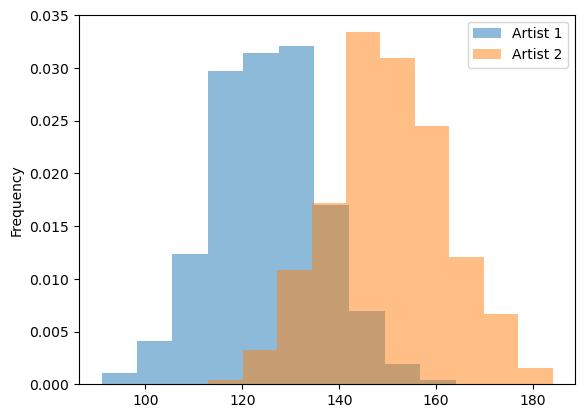

In [139]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The first part `\s` matches any whitespace character and the `+` matches the previous token as many times as possible.


In [140]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [148]:
# Obtain length of artist's lyrics and store as new column
lyrics_df['lyric_length'] = [len(item) for item in lyrics_df['lyrics_tokenized']]
lyrics_df.head()

,artist,filename,title,lyrics,lyrics_tokenized,lyric_length
0,cher,cher_88degrees.txt,"""88 Degrees""","Stuck in L.A., ain't got no friends And so Hol...","[stuck, la, aint, got, friends, hollywood, nut...",180
1,cher,cher_adifferentkindoflovesong.txt,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane Wou...,"[world, crazy, sane, would, strange, cant, bel...",133
2,cher,cher_afterall.txt,"""After All""","Well, here we are again I guess it must be fat...","[well, guess, must, fate, weve, tried, deep, i...",120
3,cher,cher_again.txt,"""Again""",Again evening finds me at your door Here to as...,"[evening, finds, door, ask, could, try, dont, ...",34
4,cher,cher_alfie.txt,"""Alfie""","What's it all about, Alfie? Is it just for the...","[whats, alfie, moment, live, whats, sort, alfi...",66


artist
cher     AxesSubplot(0.125,0.11;0.775x0.77)
robyn    AxesSubplot(0.125,0.11;0.775x0.77)
Name: lyric_length, dtype: object

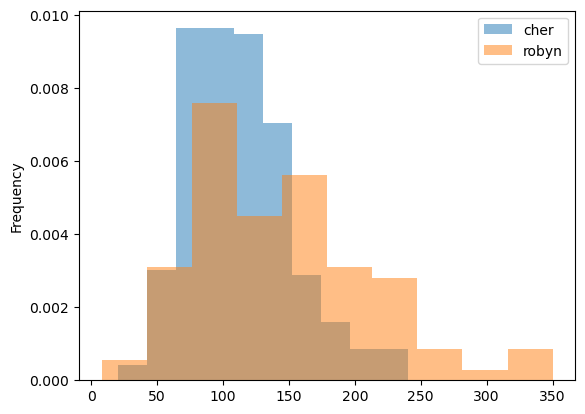

In [149]:
# Your lyric length comparison chart here.
lyrics_df.groupby('artist')['lyric_length'].plot(kind="hist",density=True,alpha=0.5,legend=True)